In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import os

In [2]:
# resets the dictionary
trials = {}

In [3]:
# # reads in motion data to dictionary
def mot_reader(trial):
    for files in os.walk('C:/Users/rosha/OneDrive/Documents/WEAV_joint/WEAV-Joint-Range-Of-Motion/OpenSimData/Kinematics'):
        for file in files[2]:
            if trial in file:
                name = file.replace('.mot', '')
                trials["{0}".format(name)] = pd.read_csv('C:/Users/rosha/OneDrive/Documents/WEAV_joint/WEAV-Joint-Range-Of-Motion/OpenSimData/Kinematics/{}'.format(file), skiprows = 10, sep = '\t')

mot_reader('s003')

Down_10_s003_1.mot
Down_10_s003_2.mot
Down_10_s003_3.mot
Down_10_s003_4.mot
Flat_08_s003_1.mot
Flat_08_s003_2.mot
Flat_08_s003_3.mot
Flat_08_s003_4.mot
Flat_10_s003_1.mot
Flat_10_s003_2.mot
Flat_10_s003_3.mot
Flat_10_s003_4.mot
Flat_12_s003_1.mot
Flat_12_s003_2.mot
Flat_12_s003_3.mot
Flat_12_s003_4.mot
Up_10_s003_1.mot
Up_10_s003_2.mot
Up_10_s003_3.mot
Up_10_s003_4.mot


In [6]:
trials

{'Down_10_1_s003':            time  pelvis_tilt  pelvis_list  pelvis_rotation  pelvis_tx  \
 0      0.000000    -5.357169     7.758560       182.987475   0.761464   
 1      0.016667    -5.971028     8.198111       182.311093   0.756941   
 2      0.033333    -2.926097     8.666676       182.851600   0.749994   
 3      0.050000    -0.789172     8.814039       183.069699   0.747963   
 4      0.066667     0.407425     8.863831       183.721236   0.750082   
 ...         ...          ...          ...              ...        ...   
 3594  59.900000    -0.668754     5.327867       184.997481   0.688337   
 3595  59.916667    -1.291352     6.570532       184.618282   0.682397   
 3596  59.933333    -1.928156     7.607825       184.121835   0.676395   
 3597  59.950000    -2.548602     8.430958       183.728844   0.671487   
 3598  59.966667    -2.830675     9.135949       183.405158   0.668025   
 
       pelvis_ty  pelvis_tz  hip_flexion_r  hip_adduction_r  hip_rotation_r  \
 0      1.038

In [4]:
# reads in trial data from dictionary
def mags(trial_name):
  trial = []
  for key in trials.keys():
    if trial_name in key:
      trial.append(trials[key])
  # calculates magnitude of lumbar for trial
  def lum_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['lumbar_rotation'], np.nanmean(sub['lumbar_rotation']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['lumbar_rotation'])[period_start:period_end])
        peak = ((sub)['lumbar_rotation'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  # calculates magnitude of right arm flex for trial
  def raf_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['arm_flex_r'], np.nanmean(sub['arm_flex_r']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['arm_flex_r'])[period_start:period_end])
        peak = ((sub)['arm_flex_r'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  # calculates magnitude of left arm flex for trial
  def laf_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['arm_flex_l'], np.nanmean(sub['arm_flex_l']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['arm_flex_l'])[period_start:period_end])
        peak = ((sub)['arm_flex_l'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  # calculates magnitude of right elbow flex for trial
  def ref_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['elbow_flex_r'], np.nanmean(sub['elbow_flex_r']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['elbow_flex_r'])[period_start:period_end])
        peak = ((sub)['elbow_flex_r'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  # calculates magnitude of left elbow flex for trial
  def lef_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['elbow_flex_l'], np.nanmean(sub['elbow_flex_l']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['elbow_flex_l'])[period_start:period_end])
        peak = ((sub)['elbow_flex_l'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  final_trial_mags = {
      "Lumbar": (lum_mag(trial)),
      "Right Arm": (raf_mag(trial)),
      "Left Arm": (laf_mag(trial)),
      "Right Elbow": (ref_mag(trial)),
      "Left Elbow": (lef_mag(trial))
  }
  return final_trial_mags

flat_10_s003_val = mags('Flat_10_s003')
up_10_s003_val = mags('Up_10_s003')
down_10_s003_val = mags('Down_10_s003')
flat_08_s003_val = mags('Flat_08_s003')
flat_12_s003_val = mags('Flat_12_s003')

list(flat_10_s003_val.values())

[[11.459889652229593, 1.1853078231292515],
 [11.759486718724489, 1.188498299319728],
 [23.42720281032738, 1.1891014739229024],
 [24.718780494886737, 1.1880102040816325],
 [34.860210183112244, 1.1886054421768708]]

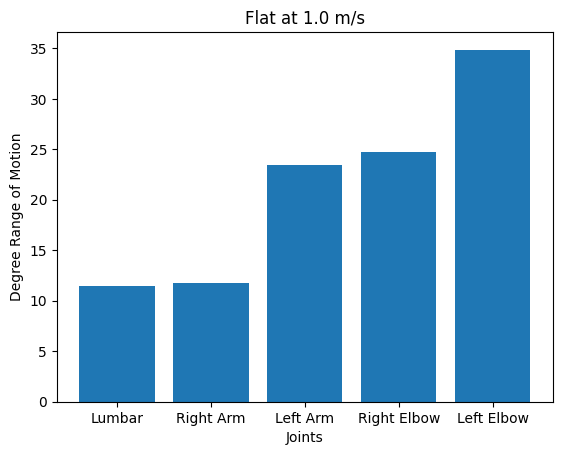

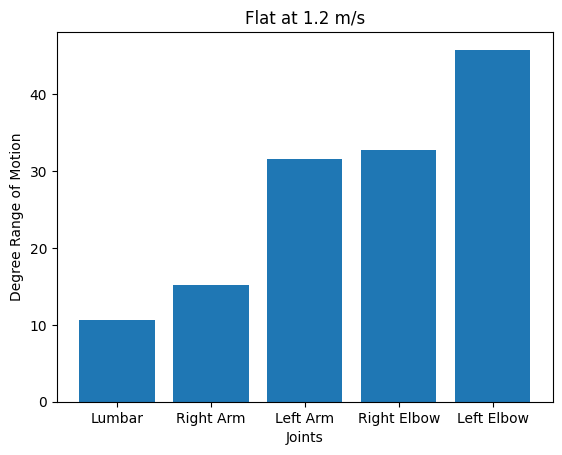

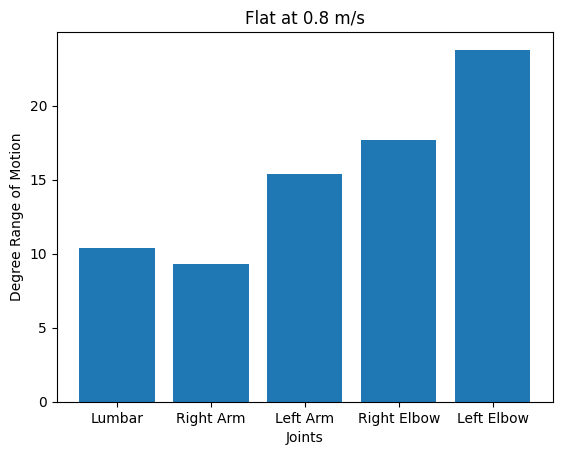

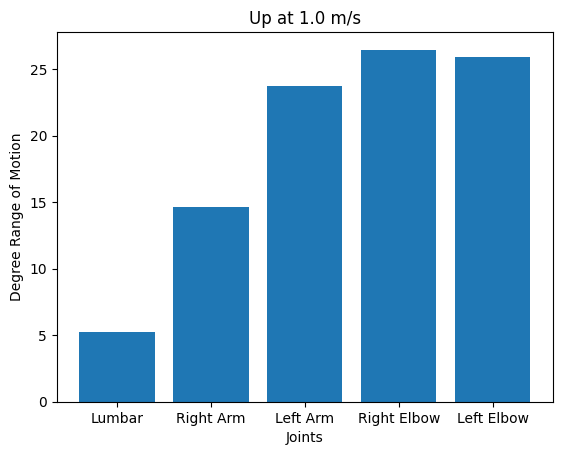

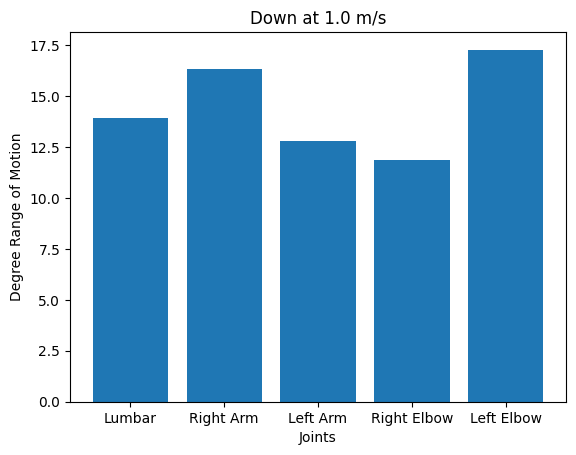

In [5]:
joints = list(flat_10_s003_val.keys())
mags = []

for item in range(5):
  mags.append(list(flat_10_s003_val.values())[item][0])

plt.bar(joints, mags)
plt.xlabel('Joints')
plt.ylabel('Degree Range of Motion')
plt.title('Flat at 1.0 m/s')
plt.show()

joints = list(flat_12_s003_val.keys())
mags = []

for item in range(5):
  mags.append(list(flat_12_s003_val.values())[item][0])

plt.bar(joints, mags)
plt.xlabel('Joints')
plt.ylabel('Degree Range of Motion')
plt.title('Flat at 1.2 m/s')
plt.show()

joints = list(flat_08_s003_val.keys())
mags = []

for item in range(5):
  mags.append(list(flat_08_s003_val.values())[item][0])

plt.bar(joints, mags)
plt.xlabel('Joints')
plt.ylabel('Degree Range of Motion')
plt.title('Flat at 0.8 m/s')
plt.show()

joints = list(up_10_s003_val.keys())
mags = []

for item in range(5):
  mags.append(list(up_10_s003_val.values())[item][0])

plt.bar(joints, mags)
plt.xlabel('Joints')
plt.ylabel('Degree Range of Motion')
plt.title('Up at 1.0 m/s')
plt.show()

joints = list(down_10_s003_val.keys())
mags = []

for item in range(5):
  mags.append(list(down_10_s003_val.values())[item][0])

plt.bar(joints, mags)
plt.xlabel('Joints')
plt.ylabel('Degree Range of Motion')
plt.title('Down at 1.0 m/s')
plt.show()

In [ ]:
metabolic_cpet = pd.read_csv('C:/Users/rosha/Downloads/s003/s003_cpet.csv', skiprows=[1, 2])
metabolic_ree = pd.read_csv('C:/Users/rosha/Downloads/s003/s003_ree.csv', skiprows=[1, 2])

vo2 = metabolic_cpet[['t', 'VO2']]

# plot VO2
plt.plot(vo2['t'], vo2['VO2'])
plt.xlabel('Time (s)')
plt.ylabel('VO2 (L/min)')
plt.title('VO2 over Time')
plt.show()

# calculate moving average of VO2
vo2['MA'] = vo2['VO2'].rolling(window=10).mean()

# plot moving average of VO2
plt.plot(vo2['t'], vo2['MA'])
plt.xlabel('Time (s)')
plt.ylabel('VO2 (L/min)')
plt.title('VO2 over Time')
plt.show()